# Gene overlap—NIDA Genetics Consortium Meeting
**Author:** Jesse Marks <br>
**email:** `FW: NIDA Genetics Meeting Abstracts Due Oct 18th`

Our collaborator at UNC Hyejung Won is working on an abstract for the NIDA Genetics Consortium meeting (NGC) and we would like to look-up her top genes in the gene-level LIBD differential expression results. We want to look at the overlap between Hyejung's gene results and our two brain regions. 



## Data Description
### LIBD (in-house)
Our in-house differential expression results are located:
* NAc (nucleus accumbes): `\\rtpnfil02\dhancock\R01DA042090\NAc_RNAexp\deseq2_dge_nac_aa_ea_mega_results.txt`
* PFC (prefrontal cortex): ~~`\\rtpnfil02\dhancock\R01DA042090\PFC_RNAexp\FullResults\Full_Adult_Results_Genes.csv`~~
`\\RTPNFIL02\dhancock\R01DA042090\PFC_RNAexp\from_libd_drive\tables\Genes_DE_sva_adult.txt`


Line counts:
```
  32030 deseq2_dge_nac_aa_ea_mega_results.txt
    18068 Genes_DE_sva_adult.txt
  ~~24478 Full_Adult_Results_Genes.csv~~
```

head deseq2_dge_nac_aa_ea_mega_results.txt
```
baseMean        log2FoldChange  lfcSE   stat    pvalue  padj    name
ENSG00000000003.14      427.182844179728        0.02239190620959        0.0385160118882756      0.58136616725903        0.560993694591725       0.969090646513473      TSPAN6
ENSG00000000419.12      492.217746214821        0.0270485585211071      0.0243684562785049      1.10998243844302        0.267006594120822       0.926726416092791      DPM1
```

head Genes_DE_sva_adult.txt
```
"Chr"   "Start" "End"   "Strand"        "Length"        "Symbol"        "EntrezID"      "logFC" "AveExpr"       "t"     "P.Value" "adj.P.Val"     "B"
"ENSG00000019169"       "chr2"  119699742       119752236       "+"     2079    "MARCO" 8685    -1.60327658933916       -1.80182961895144 -6.14514308161302       4.66989309094823e-09    8.43709584741616e-05    3.6596038673825
"ENSG00000260400"       "chr10" 70458257        70460551        "+"     2295    ""      NA      0.151581268329608       1.17141771504815  4.09835998622013        6.18298402092596e-05    0.325280945672042       1.21447735621598
"ENSG00000011201"       "chrX"  8496915 8700227 "-"     7131    "KAL1"  3730    0.142314306309377       4.24575912115895 4.09391749938238 6.29277228510435e-05    0.325280945672042       1.55561698454911
```

<br><br>

### Hyejung
Hyejung's results files are located in this Dropbox folder: <br>
`https://www.dropbox.com/sh/4vzixdm1xh0g9pm/AACaR5vCfU-eDFGdlyRCUK7pa?dl=0`


There are currently three files:
1.	CPD_GSCAN_HMAGMA_AB.out: H-MAGMA  results for CPD (using adult brain Hi-C data)
2.	ND_GSCAN_HMAGMA_AB.out: H-MAGMA results for ND (using adult brain Hi-C data)
3.	RRHO_NDvsCPD.csv: the result of RRHO; genes that are associated with both CPD and ND. We use this gene list for pleiotropic genes (also using adult brain Hi-C data)



H-MAGMA results have the following columns: 
```
GENE: Genes in ENSGIDs 
CHR      START       STOP: Gene chromosome, start, and end 
NSNPS: # of SNPs assigned  
NPARAM: parameters calculated by H-MAGMA 
N: Sample size
ZSTAT: Z-score of association    
P: P-value of association
```


## Pre-processing
**deseq2_dge_nac_aa_ea_mega_results.txt**
* Prepend *ensembl_id* to the header (this header name was missing from results file)
* Remove decimal point and trailing digits from ensembl_id entry (related to ensembl version number for a gene)

**Full_Adult_Results_Genes.csv**
* Prepend *ensembl_id* to the header (this header name was missing from results file)

## gene lookup script
We want to append the CPD Pvalue and the ND Pvalue to the end of both sets of LIBD differential expression results. So for example, the NAc results with the appended CPD & ND Pvalues would look like:

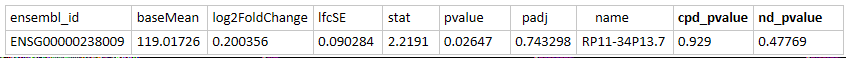

### NAc

In [ ]:
### python3 ###
libd_results = "libd_results/deseq2_dge_nac_aa_ea_mega_results.txt"
hyejung_results1 = "hyejung_results/CPD_GSCAN_HMAGMA_AB.out"
hyejung_results2 = "hyejung_results/ND_GSCAN_HMAGMA_AB.out"
outfile = "overlap/libd_nac_cpd_nd_gene_overlap_results.txt"

with open(libd_results) as libF, open(hyejung_results1) as cpdF, \
     open(hyejung_results2) as ndF, open(outfile, "w") as outF:

    head = libF.readline().strip()
    head += "\tcpd_pvalue\tnd_pvalue\n"
    print(head)
    outF.write(head)

    cpd_dict = {}
    nd_dict = {}

    next(cpdF)
    line = cpdF.readline()
    while line:
        sl = line.split()
        gene = sl[0]
        pvalue = sl[8]
        cpd_dict[gene] = pvalue 
        line = cpdF.readline()

    next(ndF)
    line = ndF.readline()
    while line:
        sl = line.split()
        gene = sl[0]
        pvalue = sl[8]
        nd_dict[gene] = pvalue 
        line = ndF.readline()

    line = libF.readline()
    while line:
        sl = line.split()
        sl.extend(["na", "na"]) # adding positions for cpd & nd pvalues
        ensembl = sl[0]
        if ensembl in cpd_dict:
            sl[8] = cpd_dict[ensembl]
        if ensembl in nd_dict:
            sl[9] = nd_dict[ensembl]
        
        outline = "\t".join(sl) + "\n"
        outF.write(outline)
        line = libF.readline()

### PFC

In [ ]:
### python3 ###
libd_results = "lib/Genes_DE_sva_adult.txt"
hyejung_results1 = "hye/CPD_GSCAN_HMAGMA_AB.out"
hyejung_results2 = "hye/ND_GSCAN_HMAGMA_AB.out"
outfile = "overlap/libd_pfc_cpd_nd_gene_overlap_results_20101021.txt"

with open(libd_results) as libF, open(hyejung_results1) as cpdF, \
     open(hyejung_results2) as ndF, open(outfile, "w") as outF:


    head = libF.readline().strip()
    head = [x.strip('"') for x in head.split()]
    head.extend(["cpd_pvalue", "nd_pvalue"])
    print(head)
    head = "\t".join(head) + "\n"
    outF.write(head)

    cpd_index = 14
    nd_index = 15

    cpd_dict = {}
    nd_dict = {}

    next(cpdF)
    line = cpdF.readline()
    while line:
        sl = line.split()
        gene = sl[0]
        pvalue = sl[8]
        cpd_dict[gene] = pvalue 
        line = cpdF.readline()

    next(ndF)
    line = ndF.readline()
    while line:
        sl = line.split()
        gene = sl[0]
        pvalue = sl[8]
        nd_dict[gene] = pvalue 
        line = ndF.readline()

    line = libF.readline().strip()
    while line:
        sl = line.split()
        sl = [x.strip('"') for x in line.split()]
        sl.extend(["na", "na"]) # adding positions for cpd & nd pvalues
        ensembl = sl[0]
        if ensembl in cpd_dict:
            sl[cpd_index] = cpd_dict[ensembl]
        if ensembl in nd_dict:
            sl[nd_index] = nd_dict[ensembl]
        
        outline = "\t".join(sl) + "\n"
        outF.write(outline)
        line = libF.readline().strip()